
# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

## Steps in this Tutorial

In this tutorial, we are going to cover:

1. Before you start
2. Install YOLOv8
3.  Preparing a custom dataset
4. Custom Training
5. Validate Custom Model
6. Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Runtime` -> `Change Runtime Type`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Jun 22 09:37:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8
There are two ways to install YOLOv8
- From the source (for development)
- Via pip (recommended)

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone https://github.com/ultralytics/ultralytics.git
# %cd {HOME}/ultralytics
# !pip install -e .


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible.

In [ ]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

### Download the Dataset
The dataset includes 299 images. Alumunium defects such as `corner defect`, `dent`, `scratch`, `spidol` are annotated in YOLOv8 format.

In [ ]:
!gdown 1fFJ5LmZ6ruYzIebWqfgqmqeY1LWKfgg4 -O dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1fFJ5LmZ6ruYzIebWqfgqmqeY1LWKfgg4
To: /content/dataset.zip
100% 8.68M/8.68M [00:00<00:00, 164MB/s]


You may use this notebook with your own dataset as well. To use this example with your own dataset, place your zip data file into the`/content` (HOME Directory of the Notebook) directory.

In [ ]:
#!unzip "PATH/TO/YOUR/ZIP/FILE" -d "datasets"

!unzip "dataset.zip" -d "datasets"


Archive:  dataset.zip
replace datasets/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data='{DATA_DIR}/data.yaml' epochs=10 imgsz=640

/content
100% 52.4M/52.4M [00:00<00:00, 122MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=F

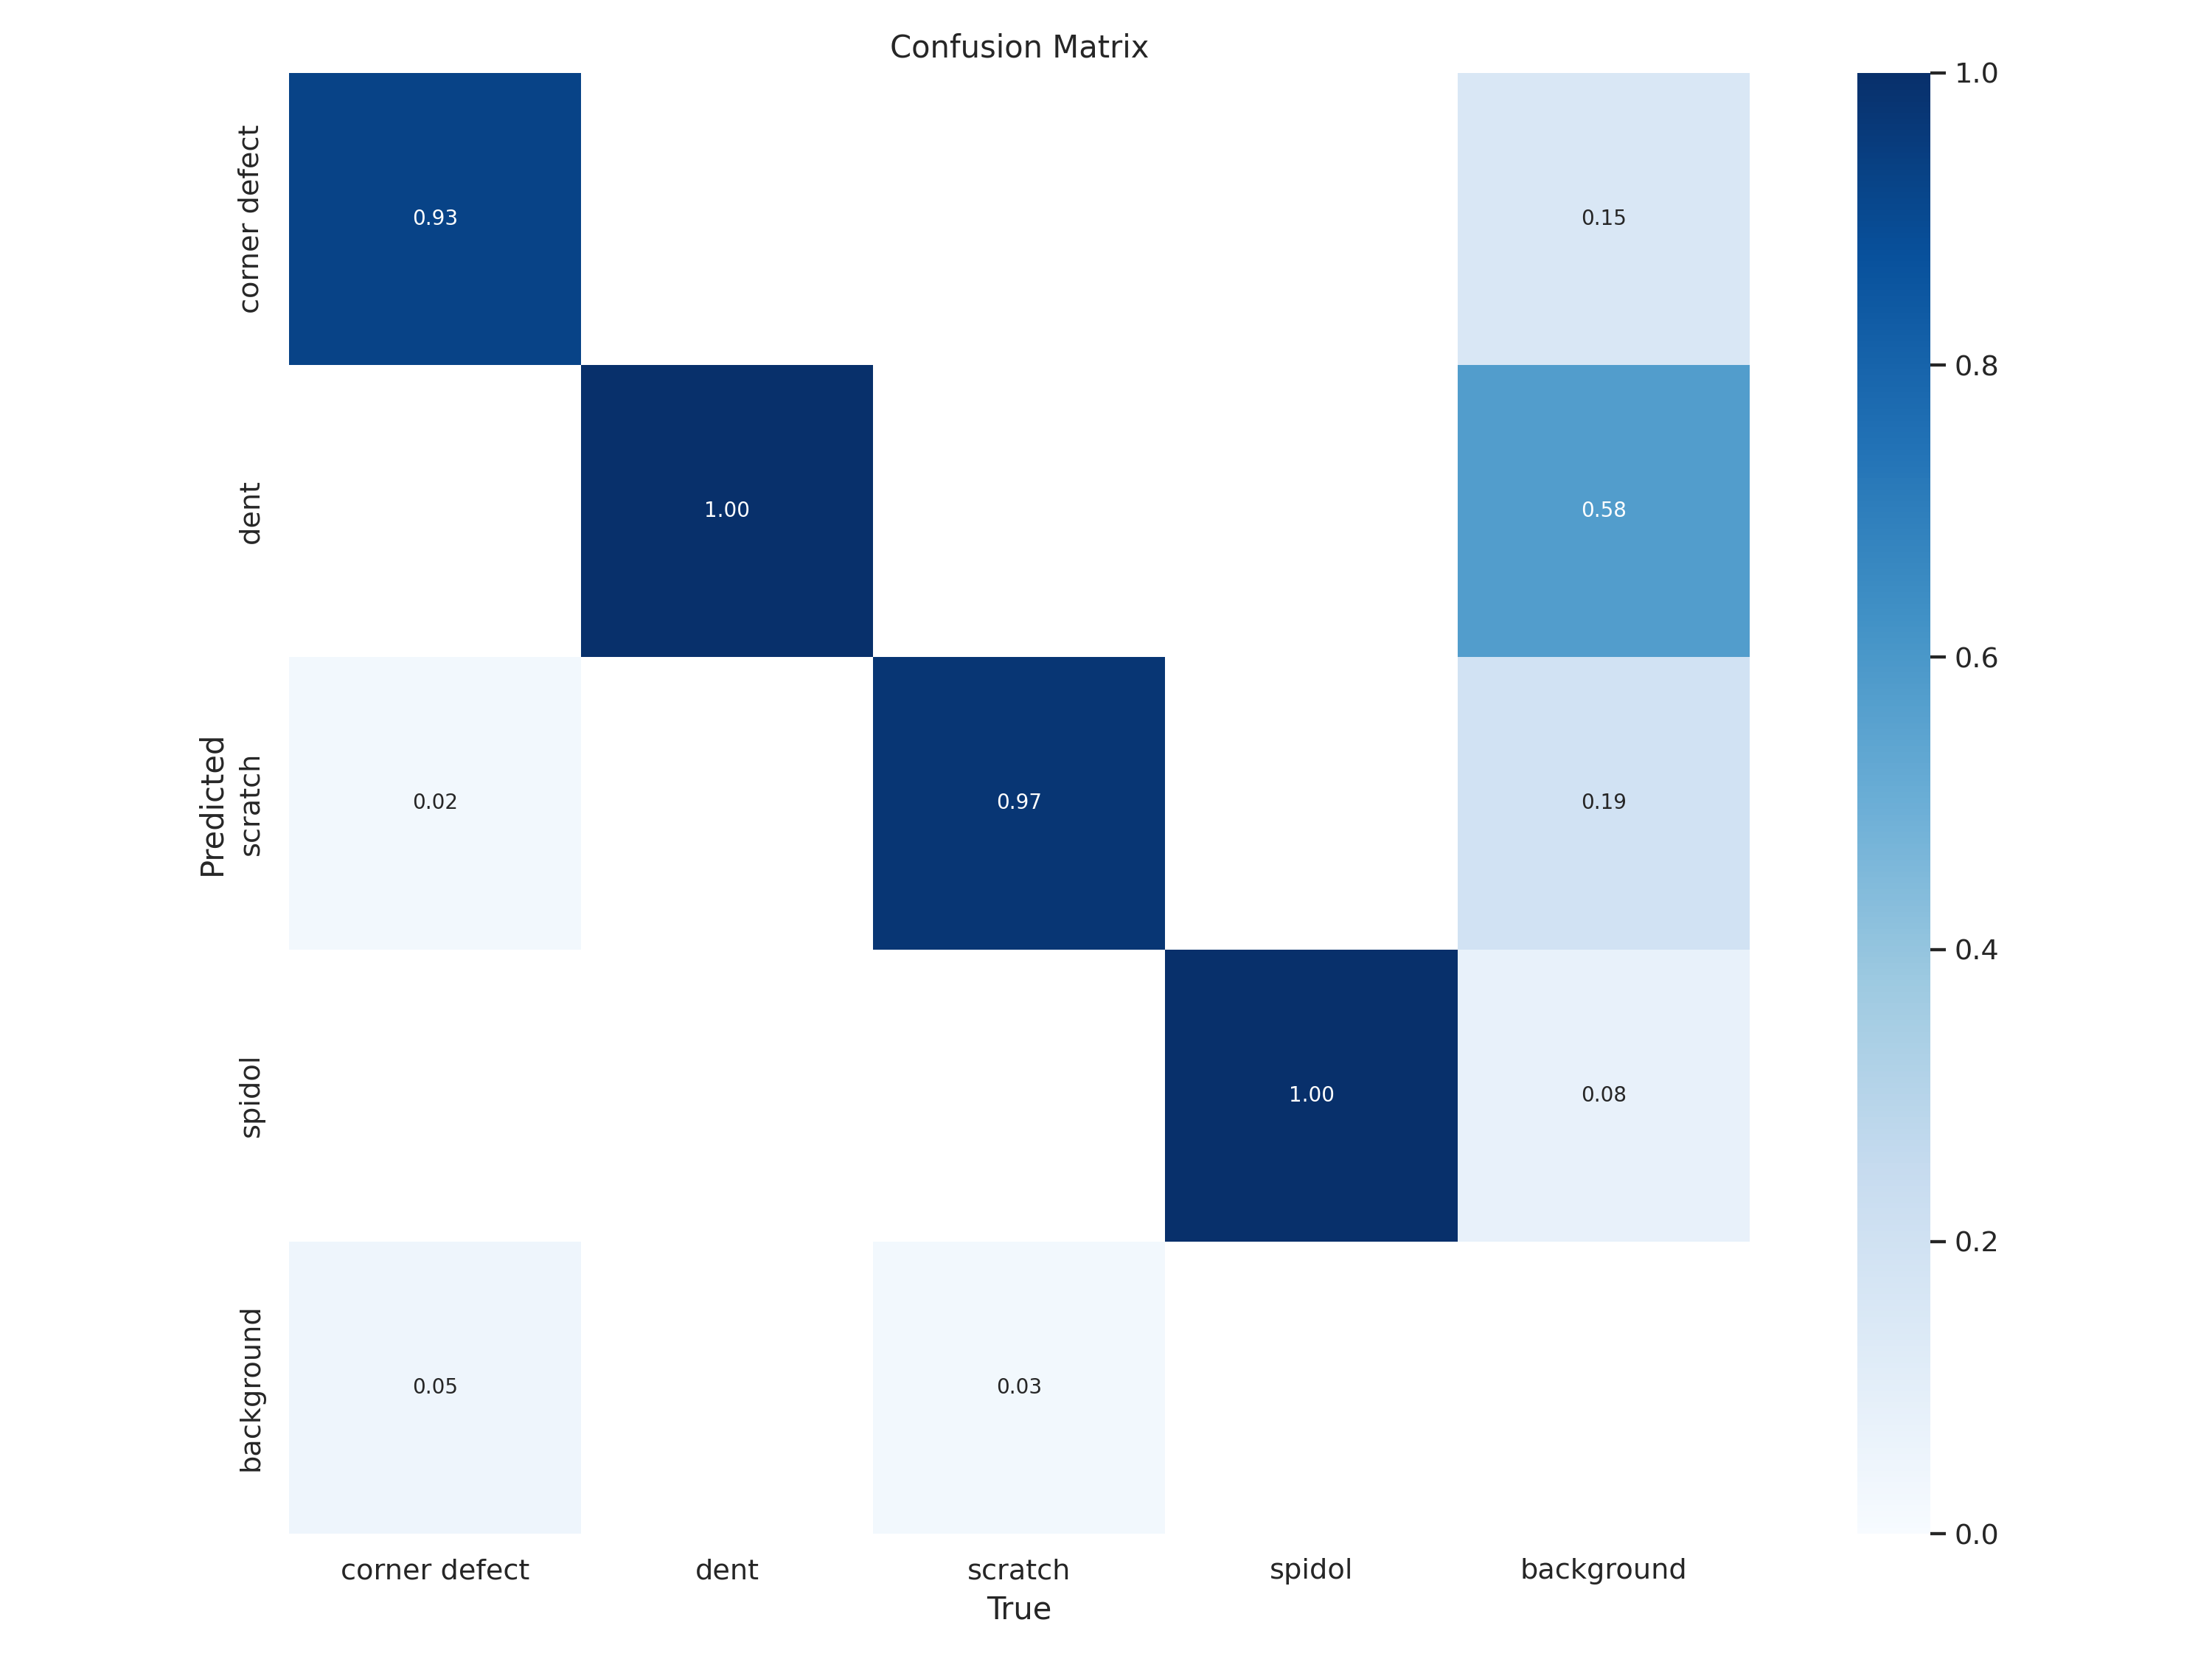

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png')

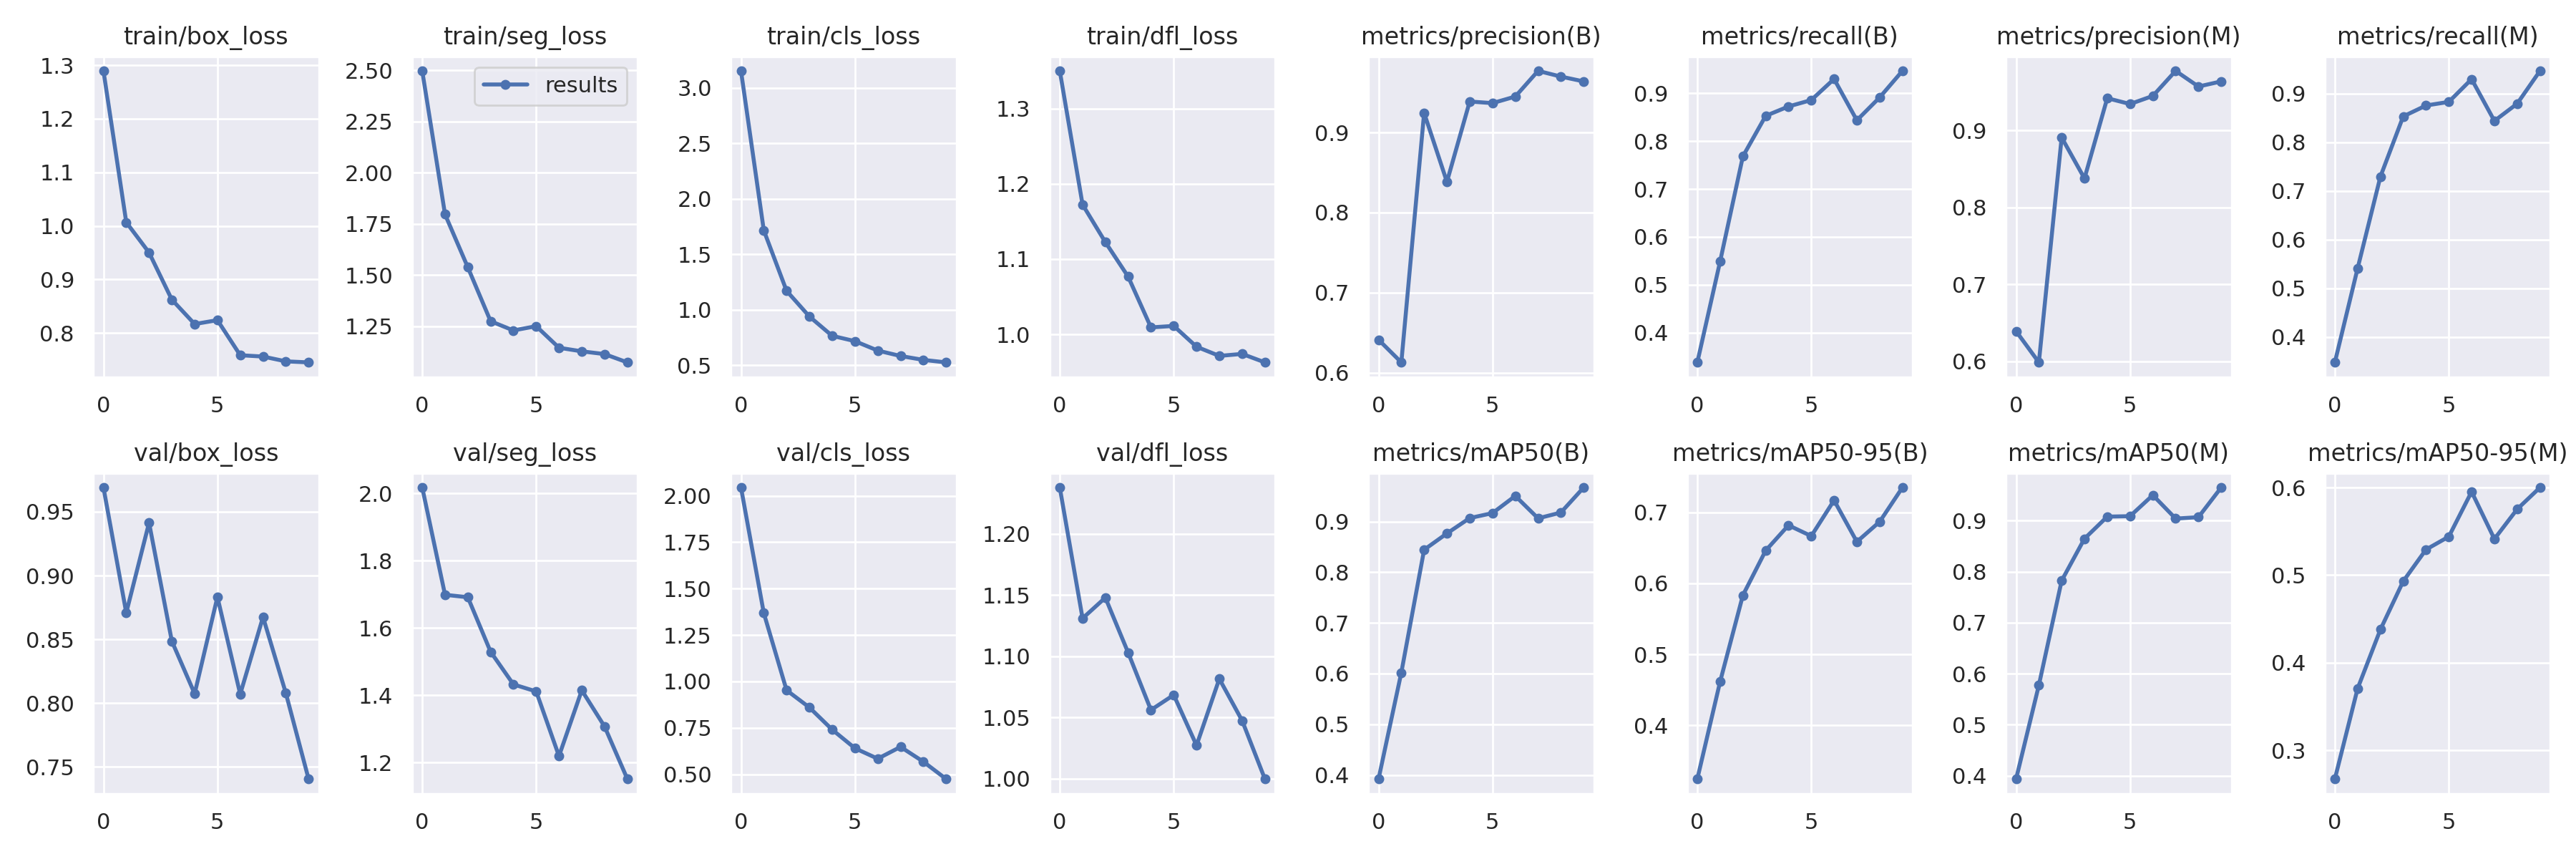

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/results.png')

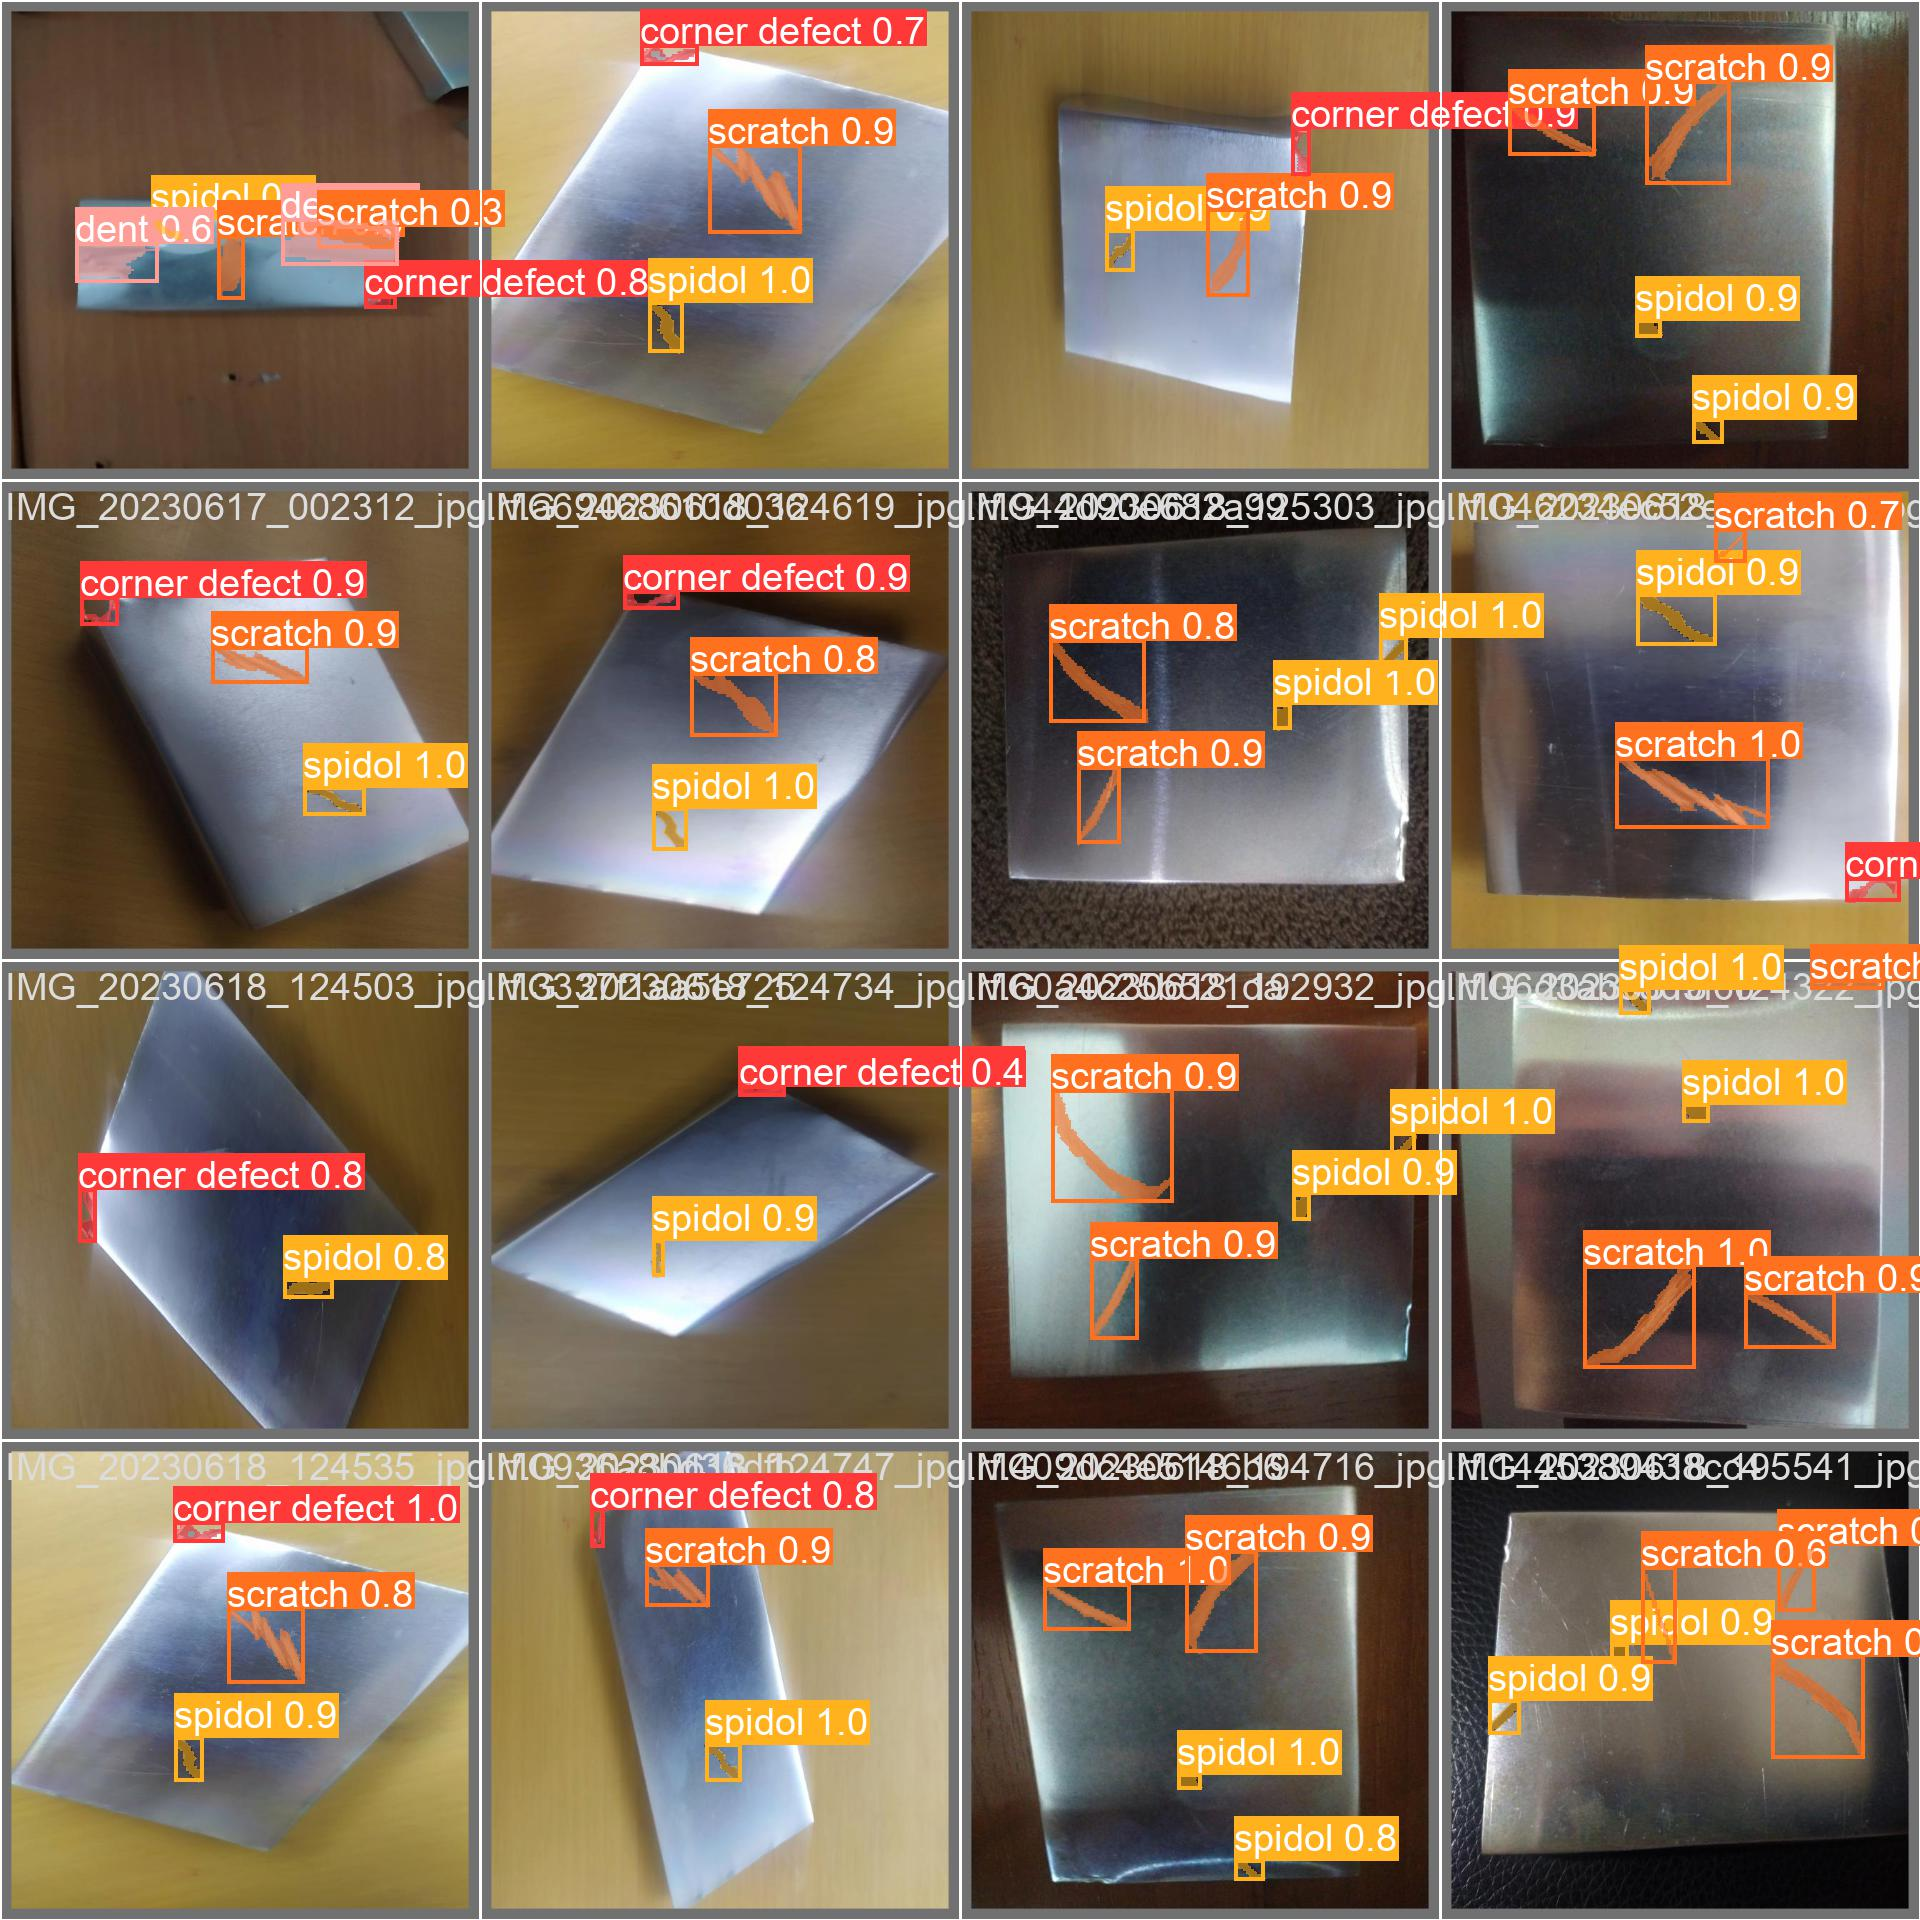

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg')

## Validate Custom Model

In [ ]:
!yolo task=segment mode=val model='{HOME}/runs/segment/train/weights/best.pt' data='{DATA_DIR}/data.yaml'

2023-06-22 10:06:10.419999: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 10:06:11.498358: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224700 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:07<00:00,  1.83s/it]
                   all         59        237      0.966      0.947      0.968      0.735      0.966   

## Inference with Custom Model

In [ ]:
!yolo task=segment mode=predict model='{HOME}/runs/segment/train/weights/best.pt' conf=0.25 source='{DATA_DIR}/test/images' save=true

2023-06-22 10:06:37.423787: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 10:06:38.391720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224700 parameters, 0 gradients, 110.0 GFLOPs

image 1/31 /content/datasets/test/images/IMG_20230617_001819_jpg.rf.068b87e66fd78038936d7f96e534bc38.jpg: 640x640 2 corner defects, 2 dents, 1 scratch, 1 spidol, 46.5ms
image 2/31 /content/datasets/test/images/IMG_20230617_003319_jpg.rf.414e3267fc78e75e13662a969ffca169.jpg: 640x640 1 corner defect, 3 dents, 1 scratch, 1 spidol, 39.0ms
image 3/31 /content/datasets/test/images/IMG_202306

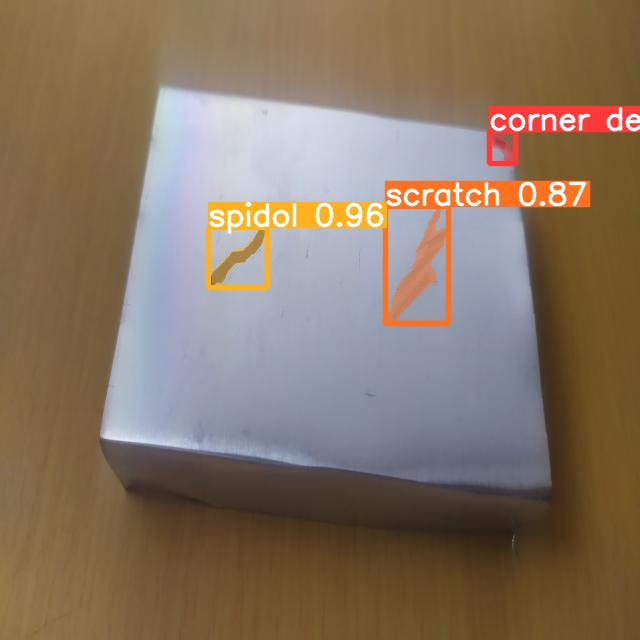

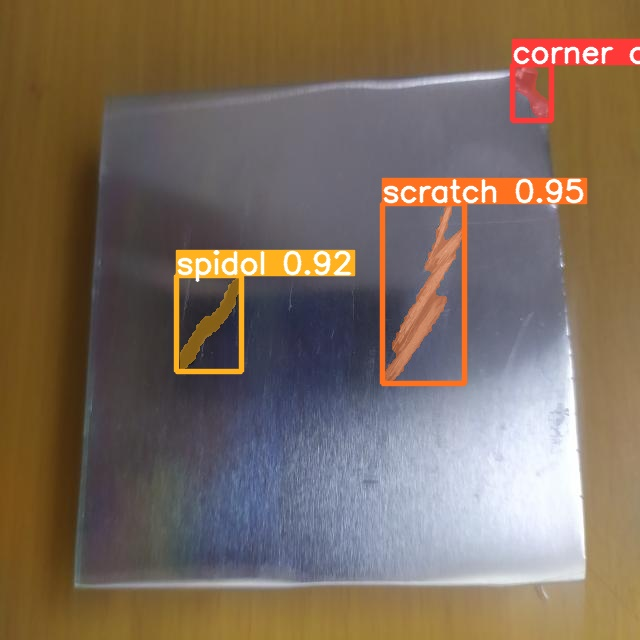

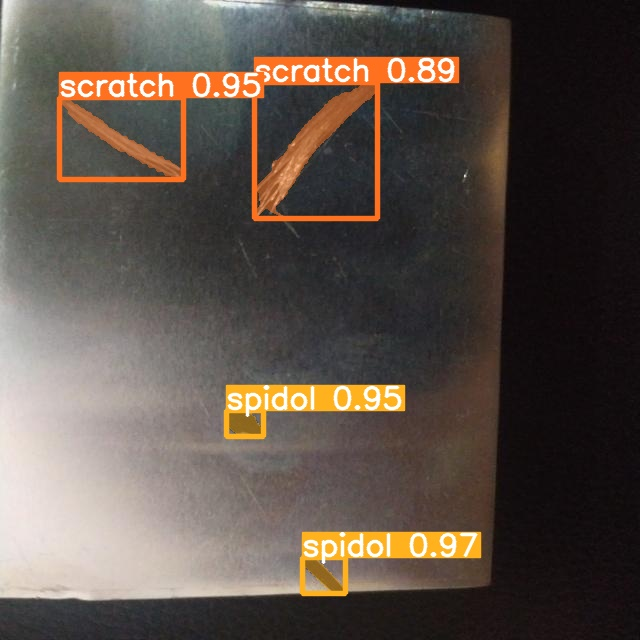

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")